In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
#import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
import seaborn as sns

In [2]:
train_sample = pd.read_csv('train_sample.csv')
print('The number of train_sample is:', train_sample.shape[0])
#rain = pd.read_csv('train.csv',nrows=10000000)
frm = 184903891-1-75000000
to = frm+40000000
dtypes = {
            'ip'            : 'uint32',
            'app'           : 'uint16',
            'device'        : 'uint16',
            'os'            : 'uint16',
            'channel'       : 'uint16',
            'is_attributed' : 'uint8',
            'click_id'      : 'uint32',
            }
train = pd.read_csv('train.csv', parse_dates=['click_time'], skiprows=range(1,frm), nrows=to-frm, dtype=dtypes, usecols=['ip','app','device','os', 'channel', 'click_time', 'is_attributed'])

test = pd.read_csv('test.csv')


('The number of train_sample is:', 100000)


In [5]:
train.head()

,ip,app,device,os,channel,click_time,is_attributed
0,103202,23,1,16,153,2017-11-08 12:33:34,0
1,143414,3,1,19,280,2017-11-08 12:33:34,0
2,173096,12,1,17,178,2017-11-08 12:33:34,0
3,8210,3,1,42,280,2017-11-08 12:33:34,0
4,5746,3,1,19,130,2017-11-08 12:33:34,0


In [6]:
train.tail()

,ip,app,device,os,channel,click_time,is_attributed
39999995,195056,2,1,13,237,2017-11-09 05:18:11,0
39999996,62227,14,1,13,442,2017-11-09 05:18:11,0
39999997,75489,3,1,42,211,2017-11-09 05:18:11,0
39999998,75650,2,1,18,237,2017-11-09 05:18:11,0
39999999,151836,2,1,35,236,2017-11-09 05:18:11,0


In [4]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [9]:
filename='X1_1000_5000.csv'
qq = pd.read_csv(filename).values

In [10]:
print(qq)

[[87540 12 1 13 497 '2017-11-07 09:30:38' nan 0]
 [105560 25 1 17 259 '2017-11-07 13:40:27' nan 0]
 [101424 12 1 19 212 '2017-11-07 18:05:24' nan 0]
 [94584 13 1 13 477 '2017-11-07 04:58:08' nan 0]
 [68413 12 1 1 178 '2017-11-09 09:00:09' nan 0]
 [93663 3 1 17 115 '2017-11-09 01:22:13' nan 0]
 [17059 1 1 17 135 '2017-11-09 01:17:58' nan 0]
 [121505 9 1 25 442 '2017-11-07 10:01:53' nan 0]
 [192967 2 2 22 364 '2017-11-08 09:35:17' nan 0]
 [143636 3 1 19 135 '2017-11-08 12:35:26' nan 0]]


In [ ]:
train['click_time'] = pd.to_datetime(train['click_time'])
test['click_time'] = pd.to_datetime(test['click_time'])
train['day'] = train['click_time'].dt.day.astype('uint8')
train['hour'] = train['click_time'].dt.hour.astype('uint8')
train['minute'] = train['click_time'].dt.minute.astype('uint8')
train['second'] = train['click_time'].dt.second.astype('uint8')
test['day'] = test['click_time'].dt.day.astype('uint8')
test['hour'] = test['click_time'].dt.hour.astype('uint8')
test['minute'] = test['click_time'].dt.minute.astype('uint8')
test['second'] = test['click_time'].dt.second.astype('uint8')

In [6]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,6,14,32,21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,6,14,33,34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,6,14,34,12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,6,14,34,52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,6,14,35,8


In [8]:
train_channel_rate=train[['ip','channel','is_attributed','second']].groupby(by=['ip','channel','is_attributed']).count().reset_index().rename(index=str,columns={'second':'channel_is_attribued_rate'})
train=train.merge(train_channel_rate, on=['ip','channel'], how='left')

KeyError: "['is_attributed'] not in index"

In [25]:

train_ip_day_hour_rate=train[['ip', 'day', 'hour','is_attributed','second']].groupby(by=['ip', 'day', 'hour','is_attributed']).count().reset_index().rename(index=str,columns={'second':'train_ip_day_hour_rate'})
print(train_ip_day_hour_rate)

            ip  day  hour  is_attributed  train_ip_day_hour_rate
0            9    6    16              0                      37
1            9    6    17              0                      19
2            9    6    18              0                       9
3            9    6    21              0                      10
4            9    6    22              0                      33
5            9    6    23              0                      46
6            9    7     0              0                      13
7           10    6    16              0                      11
8           10    6    19              0                       2
9           10    6    21              0                       3
10          10    6    22              0                       3
11          10    6    23              0                      34
12          10    7     0              0                      36
13          19    6    17              0                       2
14          19    6    22

In [7]:
test.head()

,click_id,ip,app,device,os,channel,click_time,day,hour,minute,second
0,0,5744,9,1,3,107,2017-11-10 04:00:00,10,4,0,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,10,4,0,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,10,4,0,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,10,4,0,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,10,4,0,0


In [20]:
test_hour_count=test[u'hour'].value_counts()
print(test_hour_count)
print(len(test_hour_count))

4     3344125
14    3261257
13    3212566
10    3127993
9     2984808
5     2858427
15        499
11        413
6         381
Name: hour, dtype: int64
9


In [13]:
test['hour'].unique()

array([ 4,  5,  6,  9, 10, 11, 13, 14, 15], dtype=uint64)

In [21]:
train_hour_count=train[u'hour'].value_counts()
print(train_hour_count)
print(len(train_hour_count))

23    2359612
16    2307777
17    1263348
22    1223530
18     738140
0      691432
21     509572
19     496354
20     409752
15        435
14         48
Name: hour, dtype: int64
11


In [14]:
test['minute'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=uint64)

In [8]:
train.describe()

,ip,app,device,os,channel,is_attributed,day,hour,minute,second
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,8.733172e+04,1.285964e+01,3.303871e+01,2.460008e+01,2.526604e+02,1.871700e-03,6.069143e+00,1.812106e+01,2.771472e+01,2.951417e+01
std,5.567527e+04,1.652680e+01,3.088298e+02,6.159878e+01,1.300376e+02,4.322264e-02,2.536975e-01,5.653891e+00,1.795379e+01,1.728564e+01
min,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.216400e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.340000e+02,0.000000e+00,6.000000e+00,1.600000e+01,1.100000e+01,1.500000e+01
50%,8.197300e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.370000e+02,0.000000e+00,6.000000e+00,1.800000e+01,2.700000e+01,3.000000e+01
75%,1.211870e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.770000e+02,0.000000e+00,6.000000e+00,2.200000e+01,4.400000e+01,4.400000e+01
max,2.127740e+05,6.750000e+02,3.545000e+03,7.450000e+02,4.980000e+02,1.000000e+00,7.000000e+00,2.300000e+01,5.900000e+01,5.900000e+01


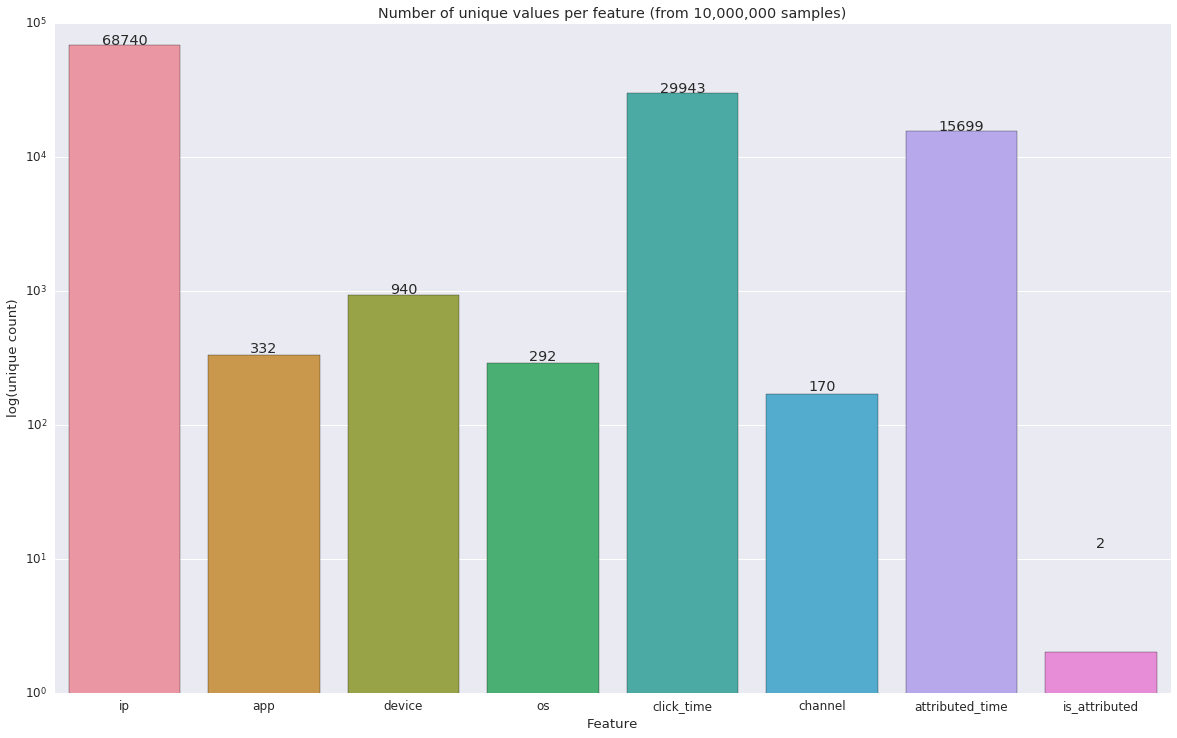

In [11]:
cols = ['ip', 'app', 'device', 'os','click_time', 'channel','attributed_time','is_attributed']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', 
       ylabel='log(unique count)', 
       title='Number of unique values per feature (from 10,000,000 samples)')
#print(cols)
#print(uniques)
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [12]:
train[train['is_attributed']==1].count()

ip                 18717
app                18717
device             18717
os                 18717
channel            18717
click_time         18717
attributed_time    18717
is_attributed      18717
day                18717
hour               18717
minute             18717
second             18717
dtype: int64

In [13]:
train[train['is_attributed']==1].ip.describe()

count     18717.000000
mean     124570.909708
std       60469.241336
min          25.000000
25%       75282.000000
50%      137658.000000
75%      174804.000000
max      212767.000000
Name: ip, dtype: float64

In [14]:
ip_count=train[train['is_attributed']==1][u'ip'].value_counts()
print(ip_count[:10])

73487     56
73516     54
5314      26
201182    25
5348      24
100275    23
105475    22
105560    16
44744     15
147957    14
Name: ip, dtype: int64


In [15]:
ip_count=train[u'ip'].value_counts()
print(ip_count[:10])

73516     51711
73487     51215
5314      35073
5348      35004
53454     25381
105560    23289
100275    23070
114276    22774
201182    22719
105475    22047
Name: ip, dtype: int64


In [16]:
app_count=train[u'app'].value_counts()
print(app_count[:10])

12    1291185
2     1202534
15    1181585
3     1170412
9      966839
18     917820
14     507491
1      391508
8      364361
21     223823
Name: app, dtype: int64


In [17]:
click_time_count=train[u'click_time'].value_counts()
print(click_time_count[:10])

2017-11-06 16:05:10    1261
2017-11-06 16:05:12    1220
2017-11-06 16:05:11    1206
2017-11-06 16:05:09    1198
2017-11-06 16:05:15    1197
2017-11-06 16:05:14    1194
2017-11-06 16:00:45    1187
2017-11-06 16:05:24    1176
2017-11-06 16:01:06    1174
2017-11-06 16:00:43    1173
Name: click_time, dtype: int64


In [18]:
os_count=train[u'os'].value_counts()
print(os_count[:10])

19    2410148
13    2199778
17     531695
18     483602
22     365576
10     285907
8      279549
6      242799
9      239377
25     232143
Name: os, dtype: int64


In [19]:
channel_count=train[u'channel'].value_counts()
print(channel_count[:10])

245    793105
134    630888
259    469845
477    412559
121    402226
107    388035
145    348862
153    296832
205    279720
178    269720
Name: channel, dtype: int64


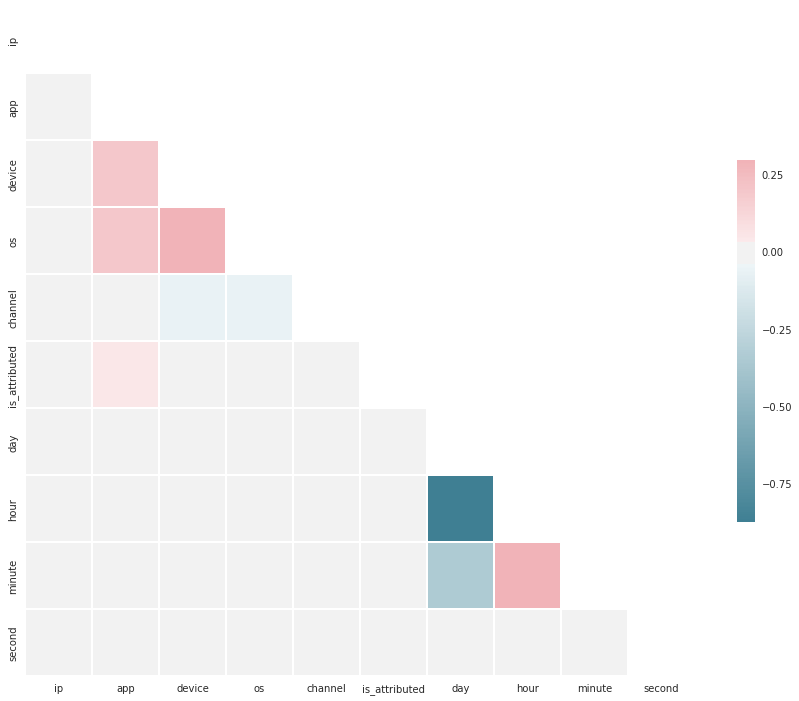

In [20]:
sns.set(style="white")

# Generate a large random dataset
temp3 = train.copy()

# Compute the correlation matrix
corr = temp3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [32]:
group_train=train.groupby(['ip']).size()

In [33]:
group_train.head(20)

ip
9     167
10     89
19     30
20    230
25     64
27    314
31     39
32     55
36    424
39     30
45    185
52     81
59    221
60     69
61     54
63    157
81     99
83     40
85     78
88    204
dtype: int64

In [58]:
df.groupby('Name').size()

Name
a    2
b    1
c    1
dtype: int64

,Age,Name
0,28,a
1,34,b
2,29,c
3,42,a
